In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import splrep, splev
from scipy.interpolate import interp2d
import math
%matplotlib inline
import pandas as pd 
from pandas import DataFrame, read_csv

/Users/Annamira/anaconda/lib/python3.6/site-packages/scipy/interpolate/fitpack.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,13 m=100 fp=0.051556 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/Users/Annamira/anaconda/lib/python3.6/site-packages/scipy/interpolate/fitpack.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,14 m=100 fp=0.016778 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/Users/Annamira/anaconda/lib/python3.6/site-packages/scipy/interpolate/fitpack.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: eith

ValueError: operands could not be broadcast together with shapes (100,) (100,22) (100,) 

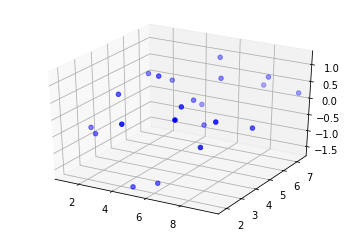

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# RUN CODE FOR GENERATED CORELLATED DATA
# (works better with model)

nRD = 22  # number of data points
scale = 0.9  # set scale

# create "real" (x,y) data locations
xRD = 10*np.random.random_sample(nRD)  # random x locations
yRD = 10*np.random.random_sample(nRD)  # random y locations

mean = np.zeros(shape=(nRD,))
cov = np.zeros(shape=(nRD,nRD))

# fill in covariance matrix as a function of generated "real data" (x,y) locations
for a in range(0,nRD):
    for b in range(0,nRD):
         cov[a][b] = math.exp(-((xRD[b]-xRD[a])**2 + (yRD[b]-yRD[a])**2)/scale**2)

zRD = np.random.multivariate_normal(mean, cov, 1).T  # generate z data ("pollution levels")

# plot many lines and store each in a (num_lines, 2, n) shaped array

num_lines = 20
eval_points = 100
x = 10*np.random.random_sample((eval_points,1)) # random x locations
y = 10*np.random.random_sample((eval_points,1)) # random y locations

tck_array = np.zeros(shape=(num_lines), dtype=object)

lines = np.zeros(shape=(num_lines), dtype=object)
lines_at_sensors = np.zeros(shape=(num_lines), dtype=object)

for i in range(0, num_lines):
    
    mean = np.zeros(shape=(eval_points,)) # set mean of generated lines epa.gov data mean
    cov = np.zeros(shape=(eval_points,eval_points))

    # fill in covariance matrix as a function of generated (x,y) locations
    for a in range(0,eval_points):
        for b in range(0,eval_points):
            cov[a][b] = math.exp(-((x[b]-x[a])**2 + (y[b]-y[a])**2)/scale**2)

    z = np.random.multivariate_normal(mean, cov, 1).T  # generate z data ("pollution levels")
  
    f = interp2d(x, y, z, kind='linear')
    tck_array[i] = f
    hold = f(xRD, yRD)
    lines[i] = z
    
    #tck = splrep(x, y, z, xb=None, xe=None, k=1)
    #tck_array[i] = tck
    #hold = splev(x, y, tck, der=0)
    #ax.scatter(x, y, hold, c='r')    
    
    lines_at_sensors[i] = hold
    
    #plt.plot(x, y, z, 'r-', alpha=0.7)

    plt.axis('equal')

    
# plot real data
ax.scatter(xRD, yRD, zRD, c='b')

# calculate and store squared error

weight_scale = 2

# create arrays to hold squared error and weighted squared error
squared_err =  np.zeros(shape=(num_lines,), dtype=object)
weighted = np.zeros(shape=(num_lines,), dtype=object)

# keep track of coefficients/scores
sum_weights = 0

# calculate
for a in range(0, num_lines):
    for b in range(0, nRD):
        #z_val = splev(zRD[b], tck_array[a], der=0)
        z_val = lines_at_sensors[a][b]
        squared_err[a] += (zRD[b]-z_val)**(2*weight_scale)
        # sum_weights += 1/(yRD[b]-z_val)**2
    sum_weights += 1/squared_err[a]
    weighted[a] = lines[a]/squared_err[a]

# calculate weighted means and standard deviations

deviation = np.zeros(shape=(eval_points))
mean = np.zeros(shape=(eval_points))

# accumulate weighted values
for a in range(0, num_lines):
    mean += weighted[a]
    deviation += (lines[a]**2)/squared_err[a]
        
mean = mean/sum_weights
deviation = (deviation/sum_weights - mean**2)

# plot mean and standard deviation

ax.plot_surface(x, y, mean)
#plt.fill_between(x, y, mean-deviation, mean+deviation, facecolor='#a0d6a9')
